In [1]:
import os; graphs_save_folder = "./t5llmNewGraphs/"; os.makedirs(graphs_save_folder, exist_ok=True)

In [2]:
# Function to convert true actions
def convert_to_classes(action):
    if action < 0.5:
        return 0
    elif action < 1.5:
        return 1
    else:
        return 2

In [3]:
# import os
# import json
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np

# # Directory containing the log files (update this path as needed)
# log_dir = r'C:\Users\User\Documents\GitHub\L4S-LLM\Log Viz'

# # Initialize lists to store the data
# episode_indexes = []
# mean_losses = []
# mean_accuracies = []
# state_features = {f"state_{i}": [] for i in range(9)}  # To store state features 0-8

# # Read the specific log file
# log_files = ["custom_logs_epoch_testseq_1.json"]  # Only using this specific log file


# with open(os.path.join(log_dir, log_files[0]), 'r') as file:
#     data = json.load(file)

#     losses = [step['test_loss'] for step in data['steps']]
#     actions_preds = [step['actions_pred'] for step in data['steps']]
#     actions = [step['actions'] for step in data['steps']]

#     # Calculate mean and median losses
#     mean_loss = np.mean(losses)
#     mean_losses.append(mean_loss)

#     # Calculate accuracy
#     accuracies = []
#     for preds, true_actions in zip(actions_preds, actions):
#         preds_array = np.array(preds)
#         true_actions_array = np.array(true_actions)
#         # Assume convert_to_classes is a function for converting actions to classes
#         true_actions_classes = np.vectorize(convert_to_classes)(true_actions_array.flatten())
#         preds_indices = preds_array.argmax(axis=1).flatten()
#         accuracy = (preds_indices == true_actions_classes).mean()
#         accuracies.append(accuracy)

#     mean_accuracy = np.mean(accuracies) if accuracies else None
#     mean_accuracies.append(mean_accuracy)

#     # Extract state features 0-8 from each step in the data
#     for step in data['steps']:
#         episode_indexes.append(len(episode_indexes))  # Use step index as the episode index
#         for i in range(8):  # Extract state features 0-8
#             state_feature_value = step['states'][0][0][i]
#             print(str(i),end=",")
#             print(state_feature_value)
#             state_features[f"state_{i}"].append(state_feature_value)
#         print("*"*50)

#     print(len(episode_indexes), len(losses), len(accuracies), len(state_features["state_0"]))

#     # Convert data into DataFrame for easier plotting
#     df = pd.DataFrame({
#         'Episode Index': episode_indexes,
#         'Mean Loss': losses,
#         'Mean Accuracy': accuracies,
#     })

# # Plotting
# plt.figure(figsize=(14, 12))


# plt.plot(df['Episode Index'], df['Mean Loss'], marker='o', label=label_name+'Mean Loss', color='blue')
# plt.title('Mean Loss over Episode Index')
# plt.xlabel('Episode Index')
# plt.ylabel('Loss')
# plt.legend()
# plt.grid()
# plt.show()


# plt.plot(df['Episode Index'], df['Mean Accuracy'], marker='o', label=label_name+'Mean Accuracy', color='green')
# plt.title('Mean Accuracy over Episode Index')
# plt.xlabel('Episode Index')
# plt.ylabel('Accuracy')
# plt.ylim(0, 1)  # Accuracy is between 0 and 1
# plt.legend()
# plt.grid()
# plt.show()

# # Plot State Features (0-8) over Episode Index
# for i in range(9):
#     print("_*_*"*50)
#     print("state_index",i)
#     print("type",type(state_features[f"state_{i}"]))
#     print("len",len(state_features[f"state_{i}"]))
#     print("[0][0]",state_features[f"state_{i}"][0])
#     plt.plot(df['Episode Index'], state_features[f"state_{i}"], marker='_', label=f'State {i}')
#     plt.title(f'State {i} over Episode Index')
#     plt.xlabel('Episode Index')
#     plt.ylabel(f'State {i} Value')
#     plt.legend()
#     plt.grid()
#     plt.show()

# plt.tight_layout()


In [4]:
label_name="Testing "

In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Directory containing the log files (update this path as needed)
log_dir = r'C:\Users\User\Documents\ADR\Viz Testing\test_log_data'

# Initialize lists to store the data
epoch_numbers = []
mean_losses = []
median_losses = []
mean_accuracies = []

# Read all the custom_logs_epoch_test_*.json files
log_files = [f for f in os.listdir(log_dir) if f.startswith('custom_logs_epoch_test_') and f.endswith('.json')]

# Sort the log files based on the epoch number
log_files.sort(key=lambda x: int(x.split('_')[-1].split('.')[0]))

# Loop through each log file and extract mean and median losses, and accuracies
for log_file in log_files:
    epoch_number = int(log_file.split('_')[-1].split('.')[0])
    epoch_numbers.append(epoch_number)

    with open(os.path.join(log_dir, log_file), 'r') as file:
        data = json.load(file)
        
        losses = [step['test_loss'] for step in data['steps']]
        actions_preds = [step['actions_pred'] for step in data['steps']]  # Ensure this key exists in your logs
        actions = [step['actions'] for step in data['steps']]  # Ground truth actions
        
        # Calculate mean and median losses
        mean_loss = sum(losses) / len(losses)
        median_loss = pd.Series(losses).median()
        
        mean_losses.append(mean_loss)
        median_losses.append(median_loss)

        # Calculate accuracy
        accuracies = []
        for preds, true_actions in zip(actions_preds, actions):
            preds_array = np.array(preds)  # Shape: (1, 3, 20)
            true_actions_array = np.array(true_actions)  # Shape: (1, 20, 1)

            # Convert true actions to classes
            true_actions_classes = np.vectorize(convert_to_classes)(true_actions_array.flatten())  # Shape: (20,)

            # Get the index of the maximum predicted value
            preds_indices = preds_array.argmax(axis=1).flatten()  # Shape: (20,)

            # Calculate accuracy
            accuracy = (preds_indices == true_actions_classes).mean()
            accuracies.append(accuracy)

            # if accuracy != 0:
            #     print("accuracy", accuracy)

            # Calculate accuracy
            # print("preds_indices",preds_indices)
            # print("true_actions_classes",true_actions_classes)
            # print("preds_indices.shape",preds_indices.shape)
            # print("preds_array.shape",preds_array.shape)
            # print("true_actions_classes.shape",true_actions_classes.shape)

        mean_accuracy = np.mean(accuracies) if accuracies else None
        mean_accuracies.append(mean_accuracy)



# Create a DataFrame for easier plotting
df = pd.DataFrame({
    'Epoch': epoch_numbers,
    'Mean Loss': mean_losses,
    'Median Loss': median_losses,
    'Mean Accuracy': mean_accuracies
})

# Plotting
plt.figure(figsize=(14, 6))

# Plot Mean Loss
plt.subplot(1, 2, 1)
plt.plot(df['Epoch'], df['Mean Loss'], marker='o', label=label_name+'Mean Loss', color='blue')
plt.plot(df['Epoch'], df['Median Loss'], marker='x', label=label_name+'Median Loss', color='orange')
plt.title('Mean and Median Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plot Mean Accuracy
plt.subplot(1, 2, 2)
plt.plot(df['Epoch'], df['Mean Accuracy'], marker='o', label=label_name+'Mean Accuracy', color='green')
plt.title('Mean Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim(0, 1)  # Assuming accuracy is between 0 and 1
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


NameError: name 'convert_to_classes' is not defined

In [2]:


# Plot mean average loss vs epoch number
plt.figure(figsize=(12, 6))
plt.plot(df['Epoch'], df['Mean Loss'], label=label_name+'Mean Loss', marker='o', color='blue')
plt.plot(df['Epoch'], df['Median Loss'], label=label_name+'Median Loss', marker='x', color='green')
plt.title('Mean and Median Loss vs Epoch Number')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))


# Plot loss vs step for each epoch

for index in range(0, len(log_files), 10):
    log_file = log_files[index]
    # print(log_file)
    epoch_number = int(log_file.split('_')[-1].split('.')[0])
    
    with open(os.path.join(log_dir, log_file), 'r') as file:
        data = json.load(file)
        steps = [step['step'] for step in data['steps']]
        losses = [step['test_loss'] for step in data['steps']]    
    plt.plot(steps, losses, label=f'Epoch {epoch_number}', marker='o')
plt.title(f'Loss vs Step for Epoch {epoch_number}')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# # Plot loss vs step for each epoch
# for log_file in log_files:
#     epoch_number = int(log_file.split('_')[-1].split('.')[0])
    
#     with open(os.path.join(log_dir, log_file), 'r') as file:
#         data = json.load(file)
#         steps = [step['step'] for step in data['steps']]
#         losses = [step['test_loss'] for step in data['steps']]
    
#     plt.figure(figsize=(12, 6))
#     plt.plot(steps, losses, label=f'Epoch {epoch_number}', marker='o')
#     plt.title(f'Loss vs Step for Epoch {epoch_number}')
#     plt.xlabel('Step')
#     plt.ylabel('Loss')
#     plt.grid(True)
#     plt.show()


NameError: name 'df' is not defined

<Figure size 1200x600 with 0 Axes>

### Plot Returns for each epoch

In [3]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the function to convert actions to classes
def convert_to_classes(action):
    """
    Placeholder function to convert action values into classes.
    Replace this logic with the actual implementation based on your use case.
    """
    return int(round(action))

# Directory containing the log files (update this path as needed)
log_dir = r'C:\Users\User\Documents\ADR\Log Viz\train_log_data3'

# Initialize lists to store the data
epoch_numbers = []
mean_losses = []
median_losses = []
mean_accuracies = []

# Read all the custom_logs_epoch_test_*.json files
log_files = [f for f in os.listdir(log_dir) if f.startswith('custom_logs_epoch_train_') and f.endswith('.json')]

# Sort the log files based on the epoch number
log_files.sort(key=lambda x: int(x.split('_')[-1].split('.')[0]))

# Loop through each log file and extract mean and median losses, and accuracies
for log_file in log_files:
    epoch_number = int(log_file.split('_')[-1].split('.')[0])
    epoch_numbers.append(epoch_number)

    with open(os.path.join(log_dir, log_file), 'r') as file:
        data = json.load(file)
        
        losses = [step['test_loss'] for step in data['steps']]
        actions_preds = [step['actions_pred'] for step in data['steps']]  # Ensure this key exists in your logs
        actions = [step['actions'] for step in data['steps']]  # Ground truth actions
        
        # Calculate mean and median losses
        mean_loss = sum(losses) / len(losses)
        median_loss = pd.Series(losses).median()
        
        mean_losses.append(mean_loss)
        median_losses.append(median_loss)

        # Calculate accuracy
        accuracies = []
        for preds, true_actions in zip(actions_preds, actions):
            preds_array = np.array(preds)  # Shape: (1, 3, 20)
            true_actions_array = np.array(true_actions)  # Shape: (1, 20, 1)

            # Convert true actions to classes
            true_actions_classes = np.vectorize(convert_to_classes)(true_actions_array.flatten())  # Shape: (20,)

            # Get the index of the maximum predicted value
            preds_indices = preds_array.argmax(axis=1).flatten()  # Shape: (20,)

            # Calculate accuracy
            accuracy = (preds_indices == true_actions_classes).mean()
            accuracies.append(accuracy)

        mean_accuracy = np.mean(accuracies) if accuracies else None
        mean_accuracies.append(mean_accuracy)

# Create a DataFrame for easier plotting
df = pd.DataFrame({
    'Epoch': epoch_numbers,
    'Mean Loss': mean_losses,
    'Median Loss': median_losses,
    'Mean Accuracy': mean_accuracies
})

# Plotting
plt.figure(figsize=(14, 6))

# Plot Mean Loss
plt.subplot(1, 2, 1)
plt.plot(df['Epoch'], df['Mean Loss'], marker='o', label='Mean Loss', color='blue')
plt.plot(df['Epoch'], df['Median Loss'], marker='x', label='Median Loss', color='orange')
plt.title('Mean and Median Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plot Mean Accuracy
plt.subplot(1, 2, 2)
plt.plot(df['Epoch'], df['Mean Accuracy'], marker='o', label='Mean Accuracy', color='green')
plt.title('Mean Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


KeyError: 'test_loss'

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


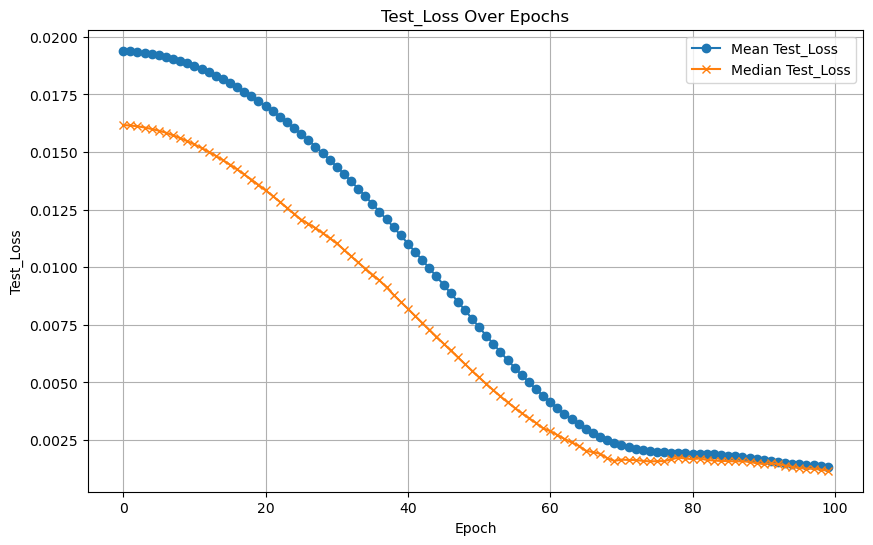

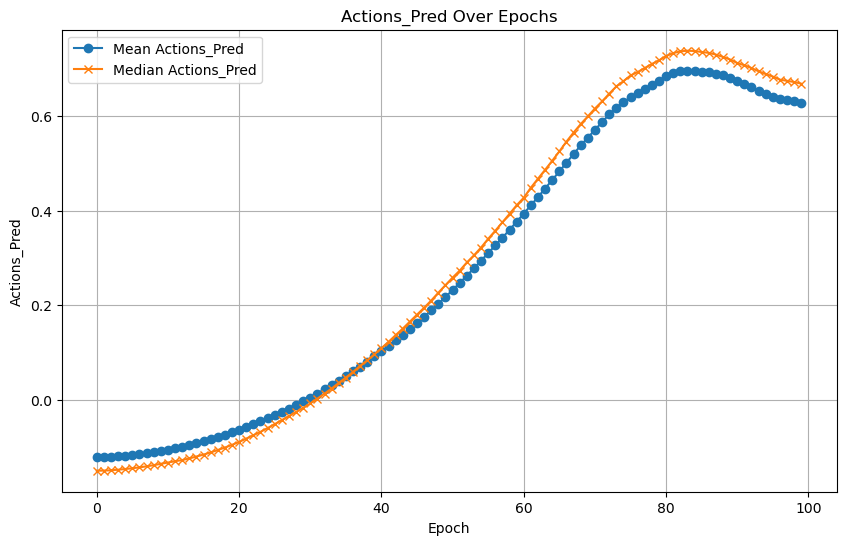

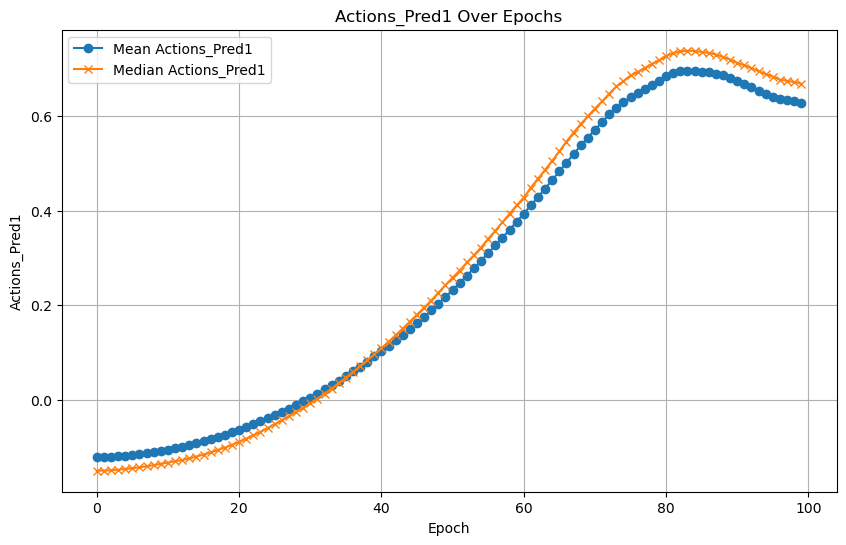

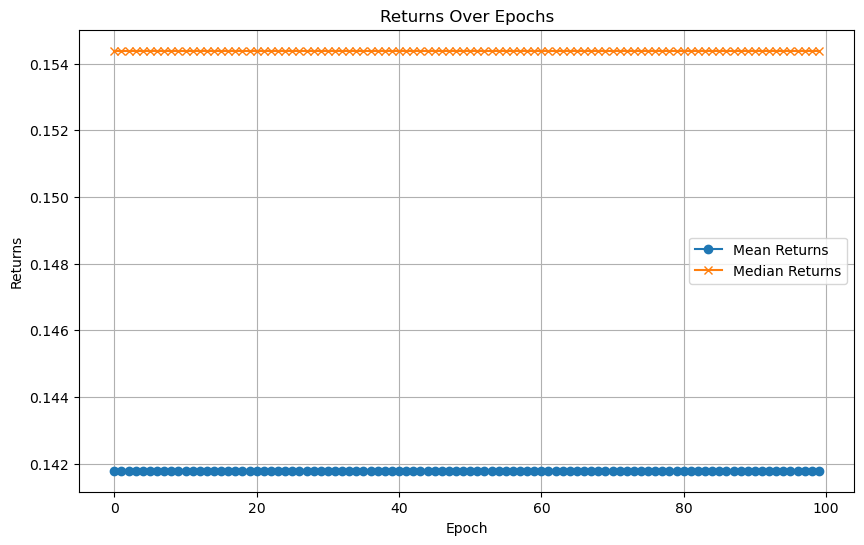

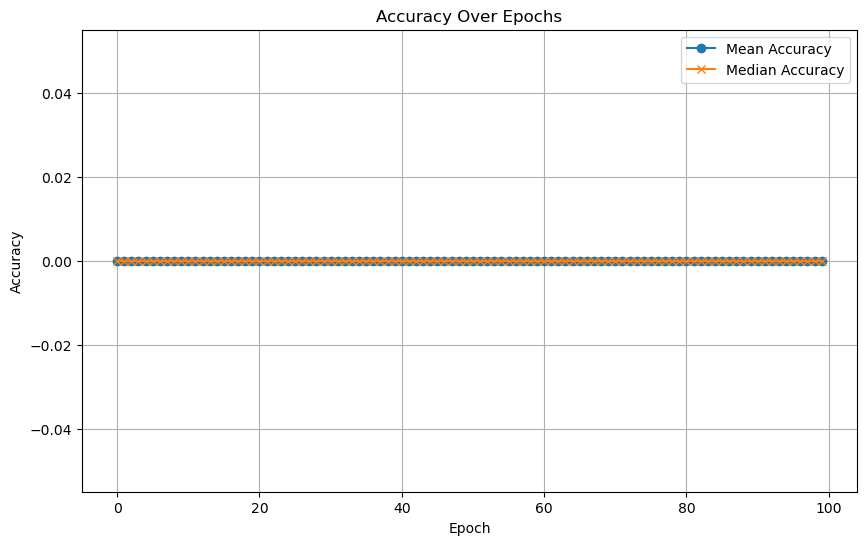

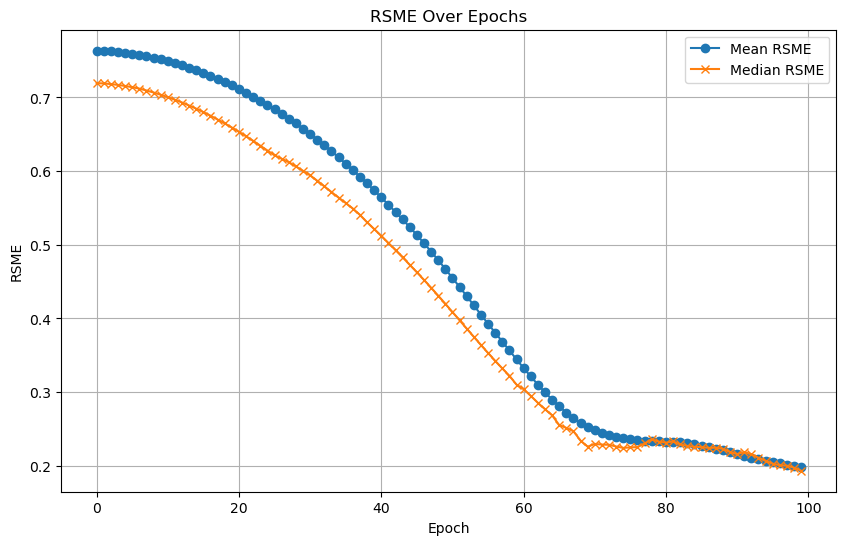

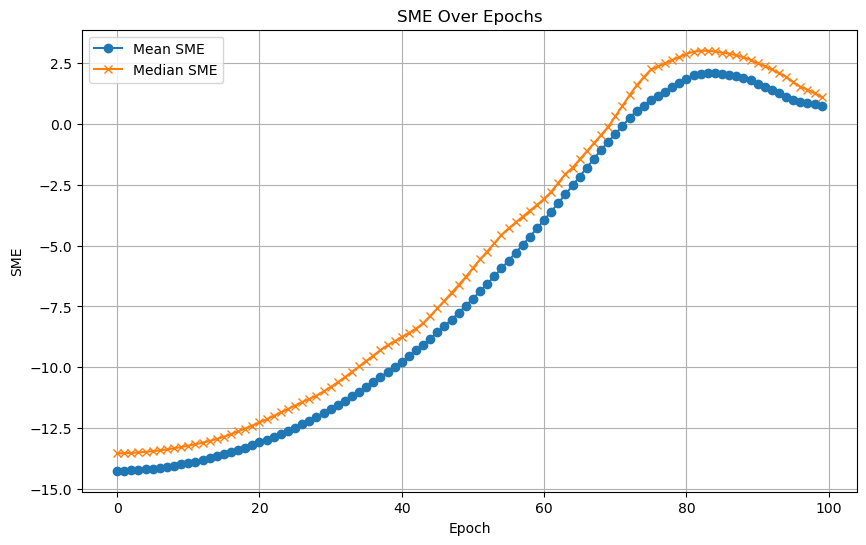

In [9]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define folder containing JSON files
log_dir = r"C:\Users\User\Documents\ADR\Viz Testing\opt_test_logs_data"


# Initialize list to store epoch data
epoch_data = []
epoch_numbers = []

# Read all the custom_logs_epoch_test_*.json files
log_files = [f for f in os.listdir(log_dir) if f.startswith('custom_logs_epoch_test_') and f.endswith('.json')]

# Sort the log files based on the epoch number
log_files.sort(key=lambda x: int(x.split('_')[-1].split('.')[0]))

# Loop through each log file and extract relevant metrics
for log_file in log_files:
    epoch_number = int(log_file.split('_')[-1].split('.')[0])
    epoch_numbers.append(epoch_number)

    with open(os.path.join(log_dir, log_file), 'r') as file:
        data = json.load(file)
    epoch_numbers.append(epoch_number)
    print(epoch_number)
    # Initialize metrics dictionary to store values for each file
    metrics = {'test_loss': [], 'actions_pred': [], 'actions_pred1': [], 'returns': [], 'accuracy': [], 'rsme': [], 'sme': []}
    
    # Extract data from each step (assuming each step contains the mentioned metrics)
    for step in data['steps']:  # Assuming 'steps' contains the 30 steps in one epoch
        # Collect the metrics
        metrics['test_loss'].append(step['test_loss'])
        metrics['actions_pred'].append(step['actions_pred'])
        metrics['actions_pred1'].append(step['actions_pred1'])
        metrics['returns'].append(step['returns'])
        
        # Calculate accuracy: Compare actions_pred and labels
        if 'actions_pred' in step and 'labels' in step:
            accuracy = np.mean(np.array(step['actions_pred']) == np.array(step['labels']))  # Compare predicted actions and labels
            metrics['accuracy'].append(accuracy)
        
        # Calculate RSME and SME: Compare actions_pred and labels
        if 'actions_pred' in step and 'labels' in step:
            actions_pred = np.array(step['actions_pred'])
            labels = np.array(step['labels'])

            # Calculate RSME (Root Mean Squared Error)
            rsme = np.sqrt(np.mean((actions_pred - labels) ** 2))
            metrics['rsme'].append(rsme)

            # Calculate SME (Sum of Mean Errors)
            sme = np.sum(actions_pred - labels)
            metrics['sme'].append(sme)

    # Compute mean and median for each metric over the steps in this file (representing one epoch)
    epoch_summary = {
        'Epoch': int(epoch_number),  # Use file name as epoch identifier
        'Mean_Test_Loss': np.mean(metrics['test_loss']),
        'Median_Test_Loss': np.median(metrics['test_loss']),
        'Mean_Actions_Pred': np.mean(metrics['actions_pred']),
        'Median_Actions_Pred': np.median(metrics['actions_pred']),
        'Mean_Actions_Pred1': np.mean(metrics['actions_pred1']),
        'Median_Actions_Pred1': np.median(metrics['actions_pred1']),
        'Mean_Returns': np.mean(metrics['returns']),
        'Median_Returns': np.median(metrics['returns']),
        'Mean_Accuracy': np.mean(metrics['accuracy']),
        'Median_Accuracy': np.median(metrics['accuracy']),
        'Mean_RSME': np.mean(metrics['rsme']),
        'Median_RSME': np.median(metrics['rsme']),
        'Mean_SME': np.mean(metrics['sme']),
        'Median_SME': np.median(metrics['sme'])
    }
    epoch_data.append(epoch_summary)

# Save the collected data to a CSV file
csv_file = "epoch_summary.csv"
df = pd.DataFrame(epoch_data)
df.to_csv(csv_file, index=False)

# Plotting the metrics
metrics_to_plot = ['Test_Loss', 'Actions_Pred', 'Actions_Pred1', 'Returns', 'Accuracy', 'RSME', 'SME']
for metric in metrics_to_plot:
    plt.figure(figsize=(10, 6))
    plt.plot(df['Epoch'], df[f'Mean_{metric}'], label=f'Mean {metric}', marker='o')
    plt.plot(df['Epoch'], df[f'Median_{metric}'], label=f'Median {metric}', marker='x')
    plt.title(f'{metric} Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel(metric)
    plt.legend()
    plt.grid()
    plt.savefig(f'{metric.lower()}_plot.png')  # Save the plot as PNG
    plt.show()


In [33]:
df.describe()

,Epoch,Mean_Test_Loss,Median_Test_Loss,Mean_Actions_Pred,Median_Actions_Pred,Mean_Actions_Pred1,Median_Actions_Pred1,Mean_Returns,Median_Returns,Mean_Accuracy,Median_Accuracy,Mean_RSME,Median_RSME,Mean_SME,Median_SME
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000
mean,49.500000,0.000993,0.000727,0.626141,0.634092,0.626141,0.634092,1.417853e-01,0.154388,0.0,0.0,0.164019,0.151576,0.703712,0.685099
std,29.011492,0.000215,0.000157,0.023086,0.024748,0.023086,0.024748,2.231632e-16,0.000000,0.0,0.0,0.017599,0.017075,0.461727,0.485452
min,0.000000,0.000584,0.000433,0.591319,0.597040,0.591319,0.597040,1.417853e-01,0.154388,0.0,0.0,0.127376,0.117698,0.007271,-0.027220
25%,24.750000,0.000814,0.000614,0.609530,0.612480,0.609530,0.612480,1.417853e-01,0.154388,0.0,0.0,0.150013,0.140214,0.371497,0.213304
50%,49.500000,0.001015,0.000755,0.619542,0.627671,0.619542,0.627671,1.417853e-01,0.154388,0.0,0.0,0.168414,0.155415,0.571743,0.614715
75%,74.250000,0.001208,0.000877,0.653112,0.663088,0.653112,0.663088,1.417853e-01,0.154388,0.0,0.0,0.180628,0.167554,1.243142,1.210950
max,99.000000,0.001259,0.000922,0.663051,0.672943,0.663051,0.672943,1.417853e-01,0.154388,0.0,0.0,0.184213,0.171787,1.441911,1.444511


In [9]:
df['Epoch'].to_list()

[0,
 1,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 2,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 3,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 4,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 5,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 6,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 7,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 8,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 9,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99]

In [31]:
epoch_data

[{'Epoch': 0,
  'Mean_Test_Loss': 0.0012570543624479474,
  'Median_Test_Loss': 0.0009009385830722749,
  'Mean_Actions_Pred': 0.6562625005360573,
  'Median_Actions_Pred': 0.6669883131980896,
  'Mean_Actions_Pred1': 0.6562625005360573,
  'Median_Actions_Pred1': 0.6669883131980896,
  'Mean_Returns': 0.14178528624977316,
  'Median_Returns': 0.15438774973154068,
  'Mean_Accuracy': 0.0,
  'Median_Accuracy': 0.0,
  'Mean_RSME': 0.18421310514416653,
  'Median_RSME': 0.16979409558469358,
  'Mean_SME': 1.3061505596213523,
  'Median_SME': 1.3098364770412445},
 {'Epoch': 1,
  'Mean_Test_Loss': 0.0012562688702488349,
  'Median_Test_Loss': 0.0009023961611092091,
  'Mean_Actions_Pred': 0.6559949103863009,
  'Median_Actions_Pred': 0.666685938835144,
  'Mean_Actions_Pred1': 0.6559949103863009,
  'Median_Actions_Pred1': 0.666685938835144,
  'Mean_Returns': 0.14178528624977316,
  'Median_Returns': 0.15438774973154068,
  'Mean_Accuracy': 0.0,
  'Median_Accuracy': 0.0,
  'Mean_RSME': 0.18417275980417938,
 

In [16]:
import os
import json
import pandas as pd
import numpy as np

# Directory containing JSON files
log_data_dir = "C:\\Users\\User\\Documents\\ADR\\Viz Testing\\test_log_data"  # Replace with the directory containing your JSON files

# Initialize lists to store metrics for each epoch
epochs = []
test_losses = []
mses = []
rmses = []

# Function to compute metrics
def compute_metrics(predictions, labels):
    predictions = np.array(predictions)
    labels = np.array(labels)
    mse = np.mean((predictions - labels) ** 2)
    rmse = np.sqrt(mse)
    return mse, rmse

# Iterate through all JSON files
for i in range(100):  # Assuming files are named from 0 to 99
    file_path = os.path.join(log_data_dir, f'custom_logs_epoch_test_{i}.json')
    with open(file_path, 'r') as f:
        log_data = json.load(f)
    
    for step in log_data['steps']:
        epoch = step['step']
        test_loss = step['test_loss']
        predictions = step['actions_pred'][0]
        labels = step['labels'][0]
        
        mse, rmse = compute_metrics(predictions, labels)
        
        # Append metrics to lists
        epochs.append(epoch)
        test_losses.append(test_loss)
        mses.append(mse)
        rmses.append(rmse)

# Convert lists to a DataFrame
metrics_df = pd.DataFrame({
    'Epoch': epochs,
    'Test Loss': test_losses,
    'MSE': mses,
    'RMSE': rmses
})

# Compute mean and median
metrics_summary = {
    'Metric': ['Test Loss', 'MSE', 'RMSE'],
    'Mean': [metrics_df['Test Loss'].mean(), metrics_df['MSE'].mean(), metrics_df['RMSE'].mean()],
    'Median': [metrics_df['Test Loss'].median(), metrics_df['MSE'].median(), metrics_df['RMSE'].median()]
}
summary_df = pd.DataFrame(metrics_summary)

# Save metrics and summary to CSV in the same directory
metrics_csv_path = os.path.join(log_data_dir, 'epoch_metrics.csv')
summary_csv_path = os.path.join(log_data_dir, 'metrics_summary.csv')

metrics_df.to_csv(metrics_csv_path, index=False)
summary_df.to_csv(summary_csv_path, index=False)

print(f"Detailed metrics saved to: {metrics_csv_path}")
print(f"Summary saved to: {summary_csv_path}")


Detailed metrics saved to: C:\Users\User\Documents\ADR\Viz Testing\test_log_data\epoch_metrics.csv
Summary saved to: C:\Users\User\Documents\ADR\Viz Testing\test_log_data\metrics_summary.csv


In [8]:
import os
import json
import pandas as pd
import numpy as np

# Define the folder containing JSON files
folder_path = "C:\\Users\\User\\Documents\\ADR\\Viz Testing\\test_log_data"

# Initialize a list to store the average sending rate for each epoch
epoch_sending_rates = []

# Loop through all JSON files with the naming pattern
for epoch in range(100):  # Assuming 100 epochs, 0 to 99
    file_name = f"custom_logs_epoch_test_{epoch}.json"  # JSON file name pattern
    file_path = os.path.join(folder_path, file_name)
    
    if os.path.exists(file_path):  # Check if the file exists
        with open(file_path, 'r') as f:
            data = json.load(f)
        
        # Extract the highest action (sending rate) for each step
        sending_rates = []
        for step in data['steps']:
            if 'actions_pred' in step:
                # Find the highest action value in this step
                max_action = max(step['actions_pred'])
                sending_rates.append(max_action)
        
        # Calculate the average sending rate for this epoch
        if sending_rates:
            average_sending_rate = np.mean(sending_rates)
        else:
            average_sending_rate = 0  # Handle cases with no valid data
        
        # Append the epoch and its average sending rate to the list
        epoch_sending_rates.append({'Epoch': epoch, 'Average_Sending_Rate': average_sending_rate})
    else:
        print(f"File {file_name} not found. Skipping.")

# Save the average sending rates to a CSV file
csv_file = "average_sending_rates.csv"
df = pd.DataFrame(epoch_sending_rates)
df.to_csv(csv_file, index=False)

print(f"Average sending rates saved to {csv_file}.")


Average sending rates saved to average_sending_rates.csv.


In [12]:
import os
import json
import pandas as pd
import numpy as np

# Define the folder containing JSON files
folder_path = "C:\\Users\\User\\Documents\\ADR\\Viz Testing\\test_log_data"

# Initialize a list to store the average sending rate for each epoch
epoch_sending_rates = []

# Loop through all JSON files with the naming pattern
for epoch in range(100):  # Assuming 100 epochs, 0 to 99
    file_name = f"custom_logs_epoch_test_{epoch}.json"  # JSON file name pattern
    file_path = os.path.join(folder_path, file_name)
    
    if os.path.exists(file_path):  # Check if the file exists
        with open(file_path, 'r') as f:
            data = json.load(f)
        
        # Extract the highest action (sending rate) for each step using list comprehension
        sending_rates = [
            max(step['actions_pred']) for step in data['steps'] if 'actions_pred' in step
        ]
        
        # Calculate the average sending rate for this epoch
        average_sending_rate = np.mean(sending_rates) if sending_rates else 0
        
        # Append the epoch and its average sending rate to the list
        epoch_sending_rates.append({'Epoch': epoch, 'Average_Sending_Rate': average_sending_rate})
    else:
        print(f"File {file_name} not found. Skipping.")

# Save the average sending rates to a CSV file
csv_file = "average_sending_rates.csv"
df = pd.DataFrame(epoch_sending_rates)
df.to_csv(csv_file, index=False)

print(f"Average sending rates saved to {csv_file}.")


Average sending rates saved to average_sending_rates.csv.


C:\Users\User\AppData\Local\Temp\ipykernel_31972\2712417611.py:36: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([all_sending_rates_mbps[:100], csv_sending_rates_mbps], labels=['Custom Logs (Mbps)', 'CSV Logs (Mbps)'])


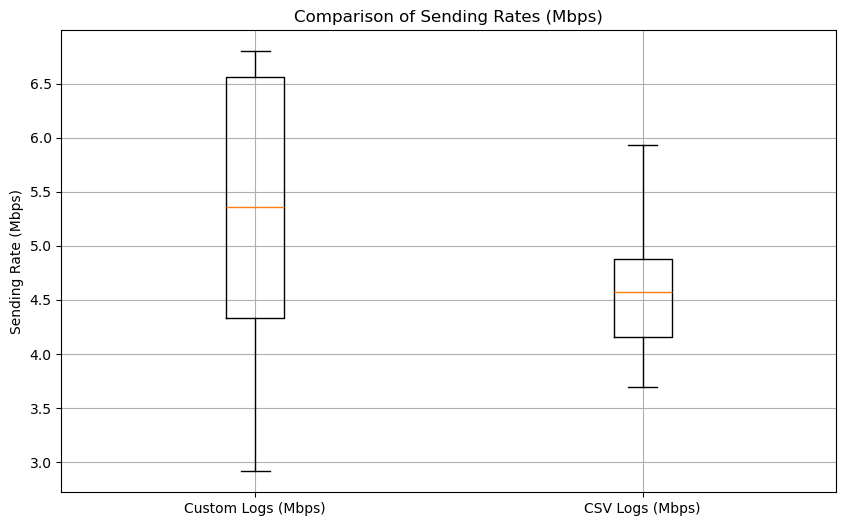

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import os

# Load your CSV file containing sending rates
csv_file = r"C:\Users\User\Documents\ADR\encoded_CCA_1.csv"
df = pd.read_csv(csv_file)

# Convert sending rates from the CSV to Mbps and take the first 100 values
csv_sending_rates_mbps = (df['SendingRate'][:100] * 8) / 1_000_000  # Assuming SendingRate is in bytes per second

# Initialize a list to store all sending rates from your existing code
all_sending_rates_mbps = []

# Process all JSON files again to collect detailed sending rates
for epoch in range(100):  # Assuming 100 epochs, 0 to 99
    file_name = f"custom_logs_epoch_test_{epoch}.json"
    file_path = os.path.join(folder_path, file_name)
    
    if os.path.exists(file_path):  # Check if the file exists
        with open(file_path, 'r') as f:
            data = json.load(f)
        
        # Extract sending rates for each step in the epoch and convert to Mbps
        for step_log in data['steps']:
            if 'actions_pred' in step_log:
                # Convert to Mbps: multiply by max_actions, 8 (bits per byte), and divide by 1_000_000
                sending_rate_mbps = (step_log['actions_pred'][0][0] * max_actions * 8) / 1_000_000
                all_sending_rates_mbps.append(sending_rate_mbps)

# Create a combined box plot
plt.figure(figsize=(10, 6))

# Create box plot for both datasets
plt.boxplot([all_sending_rates_mbps[:100], csv_sending_rates_mbps], labels=['Custom Logs (Mbps)', 'CSV Logs (Mbps)'])

# Title and labels
plt.title('Comparison of Sending Rates (Mbps)')
plt.ylabel('Sending Rate (Mbps)')
plt.grid(True)

# Show the plot
plt.show()


11
asdasd
[[[0.7537403106689453, 0.588638961315155, 0.5813404321670532, 0.24701210856437683, 0.4172298312187195, 0.5207597613334656, 0.3411329388618469, 0.38572391867637634, 0.5841351747512817, 0.6790347695350647, 0.35022714734077454, 0.4188113212585449, 0.5400089025497437, 0.5557878017425537, 0.4154357314109802, 0.4845331013202667, 0.5554548501968384, 0.4230380356311798, 0.5202919244766235, 0.539914608001709]], [[0.7667564153671265, 0.580364465713501, 0.6004108786582947, 0.5841478109359741, 0.5422429442405701, 0.5775021314620972, 0.5044338703155518, 0.519580066204071, 0.5765025615692139, 0.6718302965164185, 0.6537498235702515, 0.5855168104171753, 0.6901258230209351, 0.5598243474960327, 0.5047129988670349, 0.4480590224266052, 0.5556601881980896, 0.5288472771644592, 0.6377564072608948, 0.5770000219345093]], [[0.6198649406433105, 0.4946178197860718, 0.699962854385376, 0.5947072505950928, 0.6465305685997009, 0.6086475253105164, 0.5467174053192139, 0.5989593267440796, 0.4673301875591278, 0

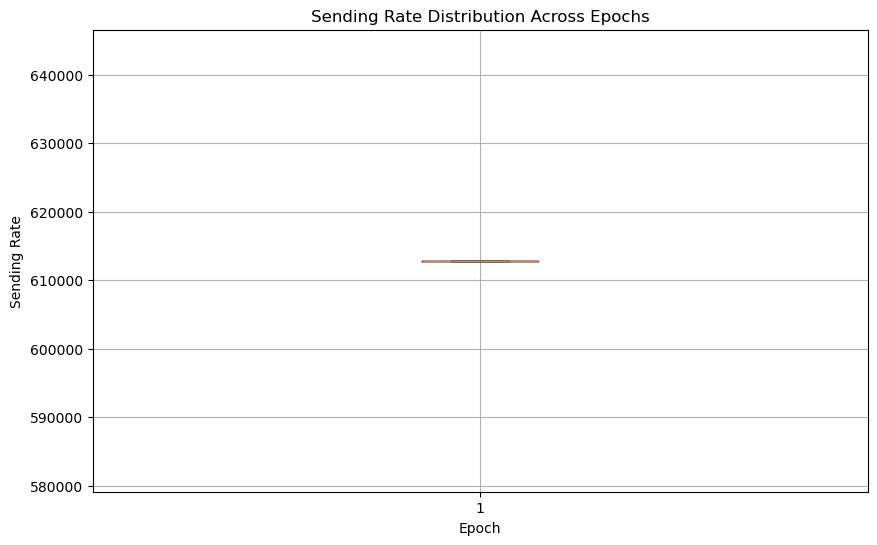

In [17]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the folder containing JSON files
folder_path = r"C:\Users\User\Documents\ADR\Viz Testing\test_llama_log0"

# Initialize a list to store the sending rates for each epoch
epoch_sending_rates = []

# Maximum actions value
max_actions = 1043241.4533971

# Loop through all JSON files with the naming pattern
for epoch in range(100):  # Assuming 100 epochs, 0 to 99
    file_name = f"custom_logs_epoch_test_{epoch}.json"  # JSON file name pattern
    file_path = os.path.join(folder_path, file_name)
    
    if os.path.exists(file_path):  # Check if the file exists
        with open(file_path, 'r') as f:
            data = json.load(f)
        sending_rates = [
            step['actions_pred'] for step in data['steps'] if 'actions_pred' in step
        ]

        print(len(sending_rates))
        print("asdasd")
        print(sending_rates)
        print(sending_rates[0][0])
        print("asdasd")
        print(len(sending_rates[0]))
        sr_list= []
        for step_log in data['steps']:
            sr_list.append(step_log['actions_pred'][0][0] * max_actions)
        
        # Extract the sending rates for each step by multiplying actions_pred with max_actions
        # sending_rates = [
        #     max(step['actions_pred'][0][0]) * max_actions for step in data['steps'] if 'actions_pred' in step
        # ]
        print("sr",sr_list)
        
        # Calculate the average sending rate for this epoch
        average_sending_rate = np.mean(sr_list) if sending_rates else 0
        
        # Append the epoch and its average sending rate to the list
        epoch_sending_rates.append({'Epoch': epoch, 'Average_Sending_Rate': average_sending_rate})
    else:
        print(f"File {file_name} not found. Skipping.")

# Save the average sending rates to a CSV file
csv_file = "average_sending_rates0.csv"
df = pd.DataFrame(epoch_sending_rates)
df.to_csv(csv_file, index=False)

print(f"Average sending rates saved to {csv_file}.")

# Plotting the box plot
plt.figure(figsize=(10, 6))
sending_rate_values = [epoch['Average_Sending_Rate'] for epoch in epoch_sending_rates]
plt.boxplot(sending_rate_values)
plt.title('Sending Rate Distribution Across Epochs')
plt.xlabel('Epoch')
plt.ylabel('Sending Rate')
plt.grid(True)
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_31972\19821650.py:36: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([all_sending_rates_mbps[:100], csv_sending_rates_mbps], labels=['LLM_Cubic',  'Cubic'])


Text(0, 0.5, 'Sending Rate (Mbps)')

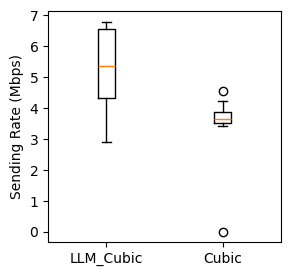

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import os

# Load your CSV file containing sending rates
csv_file = r"C:\Users\User\Documents\ADR\encoded_CCA_0.csv"
df = pd.read_csv(csv_file)

# Convert sending rates from the CSV to Mbps and take the first 100 values
csv_sending_rates_mbps = (df['SendingRate'][:100] * 8) / 1_000_000  # Assuming SendingRate is in bytes per second

# Initialize a list to store all sending rates from your existing code
all_sending_rates_mbps = []

# Process all JSON files again to collect detailed sending rates
for epoch in range(100):  # Assuming 100 epochs, 0 to 99
    file_name = f"custom_logs_epoch_test_{epoch}.json"
    file_path = os.path.join(folder_path, file_name)
    
    if os.path.exists(file_path):  # Check if the file exists
        with open(file_path, 'r') as f:
            data = json.load(f)
        
        # Extract sending rates for each step in the epoch and convert to Mbps
        for step_log in data['steps']:
            if 'actions_pred' in step_log:
                # Convert to Mbps: multiply by max_actions, 8 (bits per byte), and divide by 1_000_000
                sending_rate_mbps = (step_log['actions_pred'][0][0] * max_actions * 8) / 1_000_000
                all_sending_rates_mbps.append(sending_rate_mbps)

# Create a combined box plot
plt.figure(figsize=(3, 3))

# Create box plot for both datasets
plt.boxplot([all_sending_rates_mbps[:100], csv_sending_rates_mbps], labels=['LLM_Cubic',  'Cubic'])

# Title and labels
#plt.title('Comparison of Sending Rates (Mbps)')
plt.ylabel('Sending Rate (Mbps)')
#plt.grid(True)

# Show the plot
#plt.show()


10
asdasd
[[[0.6704903841018677, 0.5746996402740479, 0.6615009307861328, 0.6579575538635254, 0.6897889375686646, 0.6139475107192993, 0.6431753635406494, 0.6348859071731567, 0.5923244953155518, 0.7044108510017395, 0.7715349197387695, 0.6168131232261658, 0.7261866331100464, 0.6829304695129395, 0.684646487236023, 0.6446114778518677, 0.5934313535690308, 0.6818604469299316, 0.7072829604148865, 0.639225423336029]], [[0.7801172733306885, 0.592299222946167, 0.6100609302520752, 0.6466286182403564, 0.5253480672836304, 0.6794841289520264, 0.6745380163192749, 0.6181334257125854, 0.6289316415786743, 0.5922516584396362, 0.6952971816062927, 0.6629858613014221, 0.6901237964630127, 0.6079403758049011, 0.6035052537918091, 0.5816761255264282, 0.5881775617599487, 0.6656813621520996, 0.6847165822982788, 0.632952094078064]], [[0.8134915828704834, 0.7157723903656006, 0.5621988773345947, 0.5416653156280518, 0.7412223815917969, 0.7655214071273804, 0.5930972099304199, 0.6685302257537842, 0.794930100440979, 0.66

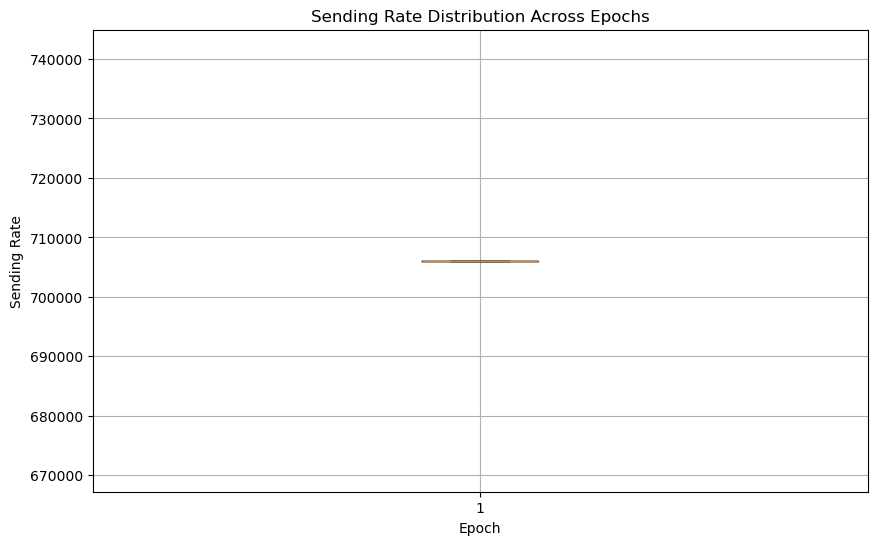

In [26]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the folder containing JSON files
folder_path = r"C:\Users\User\Documents\ADR\Viz Testing\test_llama_log2"

# Initialize a list to store the sending rates for each epoch
epoch_sending_rates = []

# Maximum actions value
max_actions = 1043241.4533971

# Loop through all JSON files with the naming pattern
for epoch in range(100):  # Assuming 100 epochs, 0 to 99
    file_name = f"custom_logs_epoch_test_{epoch}.json"  # JSON file name pattern
    file_path = os.path.join(folder_path, file_name)
    
    if os.path.exists(file_path):  # Check if the file exists
        with open(file_path, 'r') as f:
            data = json.load(f)
        sending_rates = [
            step['actions_pred'] for step in data['steps'] if 'actions_pred' in step
        ]

        print(len(sending_rates))
        print("asdasd")
        print(sending_rates)
        print(sending_rates[0][0])
        print("asdasd")
        print(len(sending_rates[0]))
        sr_list= []
        for step_log in data['steps']:
            sr_list.append(step_log['actions_pred'][0][0] * max_actions)
        
        # Extract the sending rates for each step by multiplying actions_pred with max_actions
        # sending_rates = [
        #     max(step['actions_pred'][0][0]) * max_actions for step in data['steps'] if 'actions_pred' in step
        # ]
        print("sr",sr_list)
        
        # Calculate the average sending rate for this epoch
        average_sending_rate = np.mean(sr_list) if sending_rates else 0
        
        # Append the epoch and its average sending rate to the list
        epoch_sending_rates.append({'Epoch': epoch, 'Average_Sending_Rate': average_sending_rate})
    else:
        print(f"File {file_name} not found. Skipping.")

# Save the average sending rates to a CSV file
csv_file = "average_sending_rates0.csv"
df = pd.DataFrame(epoch_sending_rates)
df.to_csv(csv_file, index=False)

print(f"Average sending rates saved to {csv_file}.")

# Plotting the box plot
plt.figure(figsize=(10, 6))
sending_rate_values = [epoch['Average_Sending_Rate'] for epoch in epoch_sending_rates]
plt.boxplot(sending_rate_values)
plt.title('Sending Rate Distribution Across Epochs')
plt.xlabel('Epoch')
plt.ylabel('Sending Rate')
plt.grid(True)
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_31972\2264065095.py:38: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([all_sending_rates_mbps[:100], csv_sending_rates_mbps], labels=['LLM_PCC',  'PCC'])


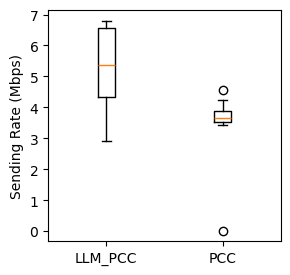

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import os

# Load your CSV file containing sending rates
csv_file = r"C:\Users\User\Documents\ADR\encoded_CCA_0.csv"
df = pd.read_csv(csv_file)

# Convert sending rates from the CSV to Mbps and take the first 100 values
csv_sending_rates_mbps = (df['SendingRate'][:100] * 8) / 1_000_000  # Assuming SendingRate is in bytes per second
#csv_sending_rates_mbps = (df['SendingRate'][:100] )
#positions = [1, 1.2]
# Initialize a list to store all sending rates from your existing code
all_sending_rates_mbps = []

# Process all JSON files again to collect detailed sending rates
for epoch in range(100):  # Assuming 100 epochs, 0 to 99
    file_name = f"custom_logs_epoch_test_{epoch}.json"
    file_path = os.path.join(folder_path, file_name)
    
    if os.path.exists(file_path):  # Check if the file exists
        with open(file_path, 'r') as f:
            data = json.load(f)
        
        # Extract sending rates for each step in the epoch and convert to Mbps
        for step_log in data['steps']:
            if 'actions_pred' in step_log:
                # Convert to Mbps: multiply by max_actions, 8 (bits per byte), and divide by 1_000000
                sending_rate_mbps = (step_log['actions_pred'][0][0] * max_actions * 8) / 1000000
                #sending_rate_mbps = (step_log['actions_pred'][0][0] * max_actions)
                all_sending_rates_mbps.append(sending_rate_mbps)
                
# Create a combined box plot
plt.figure(figsize=(3, 3))

# Create box plot for both datasets
plt.boxplot([all_sending_rates_mbps[:100], csv_sending_rates_mbps], labels=['LLM_PCC',  'PCC'])

# Title and labels
#plt.title('Comparison of Sending Rates (Mbps)')
plt.ylabel('Sending Rate (Mbps)')
# plt.xticks([1, 1.2], ['Custom Logs (Mbps)', 'CSV Logs (Mbps)'])
#plt.grid(True)

# Show the plot
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_31972\2119194766.py:37: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([all_sending_rates_mbps[:100], csv_sending_rates_mbps], labels=['LLM_BBR',  'BBR'])


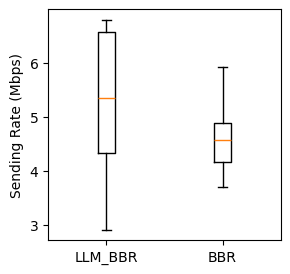

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import os

# Load your CSV file containing sending rates
csv_file = r"C:\Users\User\Documents\ADR\encoded_CCA_1.csv"
df = pd.read_csv(csv_file)

# Convert sending rates from the CSV to Mbps and take the first 100 values
csv_sending_rates_mbps = (df['SendingRate'][:100] * 8) / 1_000_000  # Assuming SendingRate is in bytes per second

#positions = [1, 1.2]
# Initialize a list to store all sending rates from your existing code
all_sending_rates_mbps = []

# Process all JSON files again to collect detailed sending rates
for epoch in range(100):  # Assuming 100 epochs, 0 to 99
    file_name = f"custom_logs_epoch_test_{epoch}.json"
    file_path = os.path.join(folder_path, file_name)
    
    if os.path.exists(file_path):  # Check if the file exists
        with open(file_path, 'r') as f:
            data = json.load(f)
        
        # Extract sending rates for each step in the epoch and convert to Mbps
        for step_log in data['steps']:
            if 'actions_pred' in step_log:
                # Convert to Mbps: multiply by max_actions, 8 (bits per byte), and divide by 1_000_000
                sending_rate_mbps = (step_log['actions_pred'][0][0] * max_actions * 8) / 1_000_000
                all_sending_rates_mbps.append(sending_rate_mbps)

# Create a combined box plot
plt.figure(figsize=(3, 3))

# Create box plot for both datasets
plt.boxplot([all_sending_rates_mbps[:100], csv_sending_rates_mbps], labels=['LLM_BBR',  'BBR'])

# Title and labels
#plt.title('Comparison of Sending Rates (Mbps)')
plt.ylabel('Sending Rate (Mbps)')
# plt.xticks([1, 1.2], ['Custom Logs (Mbps)', 'CSV Logs (Mbps)'])
#plt.grid(True)

# Show the plot
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_31972\4162495918.py:43: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([all_sending_rates_mbps[:100], csv_sending_rates_mbps], labels=['LLM_BBR', 'BBR'])


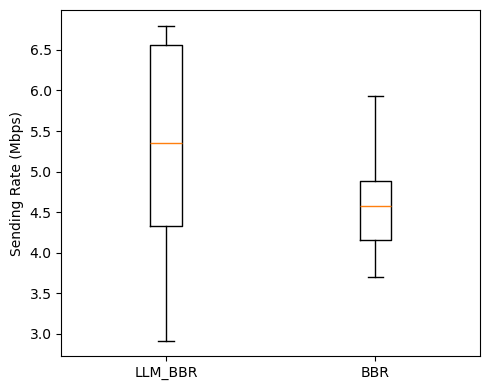

In [68]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the folder containing JSON files
folder_path = r"C:\Users\User\Documents\ADR\Viz Testing\test_llama_log1"

# Load your CSV file containing sending rates
csv_file = r"C:\Users\User\Documents\ADR\encoded_CCA_1.csv"
df = pd.read_csv(csv_file)

# Convert sending rates from the CSV to Mbps and take the first 100 values
csv_sending_rates_mbps = (df['SendingRate'][:100] * 8) / 1_000_000  # Assuming SendingRate is in bytes per second

# Maximum actions value
max_actions = 1043241.4533971

# Initialize a list to store all sending rates from JSON logs
all_sending_rates_mbps = []

# Process JSON files and extract sending rates
for epoch in range(100):  # Assuming 100 epochs, 0 to 99
    file_name = f"custom_logs_epoch_test_{epoch}.json"  # JSON file name pattern
    file_path = os.path.join(folder_path, file_name)
    
    if os.path.exists(file_path):  # Check if the file exists
        with open(file_path, 'r') as f:
            data = json.load(f)
        
        # Extract sending rates for each step in the epoch and convert to Mbps
        for step_log in data['steps']:
            if 'actions_pred' in step_log:
                # Convert to Mbps: multiply by max_actions, 8 (bits per byte), and divide by 1_000_000
                sending_rate_mbps = (step_log['actions_pred'][0][0] * max_actions * 8) / 1_000_000
                all_sending_rates_mbps.append(sending_rate_mbps)

# Create a combined box plot
plt.figure(figsize=(5, 4))

# Create box plot for both datasets
plt.boxplot([all_sending_rates_mbps[:100], csv_sending_rates_mbps], labels=['LLM_BBR', 'BBR'])

# Title and labels
plt.ylabel('Sending Rate (Mbps)')
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_31972\1414729408.py:48: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([epoch_avg_sending_rates, csv_sending_rates_mbps], labels=['LLM_BBR ', 'BBR'])


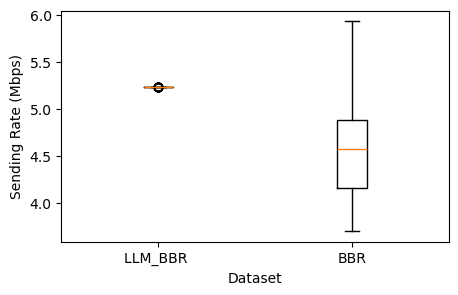

In [72]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the folder containing JSON files
folder_path = r"C:\Users\User\Documents\ADR\Viz Testing\test_llama_log1"

# Maximum actions value
max_actions = 1043241.4533971

# Initialize a list to store average sending rates for each epoch
epoch_avg_sending_rates = []

# Process all JSON files again to collect detailed sending rates and calculate averages per epoch
for epoch in range(100):  # Assuming 100 epochs, 0 to 99
    file_name = f"custom_logs_epoch_test_{epoch}.json"
    file_path = os.path.join(folder_path, file_name)
    
    if os.path.exists(file_path):  # Check if the file exists
        with open(file_path, 'r') as f:
            data = json.load(f)
        
        # Collect sending rates for this epoch
        sending_rates = [
            (step['actions_pred'][0][0] * max_actions * 8) / 1_000_000  # Convert to Mbps
            for step in data['steps'] if 'actions_pred' in step
        ]
        
        # Calculate the average sending rate for this epoch
        average_sending_rate = np.mean(sending_rates) if sending_rates else 0
        
        # Append the average sending rate for this epoch
        epoch_avg_sending_rates.append(average_sending_rate)

# Load your CSV file containing sending rates
csv_file = r"C:\Users\User\Documents\ADR\encoded_CCA_1.csv"
df = pd.read_csv(csv_file)

# Convert sending rates from the CSV to Mbps and take the first 100 values
csv_sending_rates_mbps = (df['SendingRate'][:100] * 8) / 1_000_000  # Assuming SendingRate is in bytes per second

# Create a combined box plot
plt.figure(figsize=(5, 3))

# Create box plot for both datasets (Epoch averages from JSON logs and CSV logs)
plt.boxplot([epoch_avg_sending_rates, csv_sending_rates_mbps], labels=['LLM_BBR ', 'BBR'])

# Add labels and title
# plt.title('Comparison of Sending Rates (Mbps) - JSON vs CSV')
plt.ylabel('Sending Rate (Mbps)')
plt.xlabel('Dataset')

# Show the plot
# plt.grid(True)
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_31972\801016096.py:48: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([epoch_avg_sending_rates, csv_sending_rates_mbps], labels=['LLM_Cubic ', 'Cubic'])


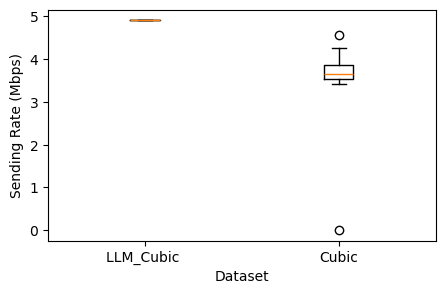

In [ ]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the folder containing JSON files
folder_path = r"C:\Users\User\Documents\ADR\Viz Testing\test_llama_log0"

# Maximum actions value
max_actions = 1043241.4533971

# Initialize a list to store average sending rates for each epoch
epoch_avg_sending_rates = []

# Process all JSON files again to collect detailed sending rates and calculate averages per epoch
for epoch in range(100):  # Assuming 100 epochs, 0 to 99
    file_name = f"custom_logs_epoch_test_{epoch}.json"
    file_path = os.path.join(folder_path, file_name)
    
    if os.path.exists(file_path):  # Check if the file exists
        with open(file_path, 'r') as f:
            data = json.load(f)
        
        # Collect sending rates for this epoch
        sending_rates = [
            (step['actions_pred'][0][0] * max_actions * 8) / 1_000_000  # Convert to Mbps
            for step in data['steps'] if 'actions_pred' in step
        ]
        
        # Calculate the average sending rate for this epoch
        average_sending_rate = np.mean(sending_rates) if sending_rates else 0
        
        # Append the average sending rate for this epoch
        epoch_avg_sending_rates.append(average_sending_rate)

# Load your CSV file containing sending rates
csv_file = r"C:\Users\User\Documents\ADR\encoded_CCA_0.csv"
df = pd.read_csv(csv_file)

# Convert sending rates from the CSV to Mbps and take the first 100 values
csv_sending_rates_mbps = (df['SendingRate'][:100] * 8) / 1_000_000  # Assuming SendingRate is in bytes per second

# Create a combined box plot
plt.figure(figsize=(5, 3))

# Create box plot for both datasets (Epoch averages from JSON logs and CSV logs)
plt.boxplot([epoch_avg_sending_rates, csv_sending_rates_mbps], labels=['LLM_Cubic ', 'Cubic'])

# Add labels and title
# plt.title('Comparison of Sending Rates (Mbps) - JSON vs CSV')
plt.ylabel('Sending Rate (Mbps)')
# plt.xlabel('Dataset')

# Show the plot
# plt.grid(True)
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_14816\1343940421.py:41: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(sending_rates_data.values(), labels=sending_rates_data.keys(), widths=0.3 )


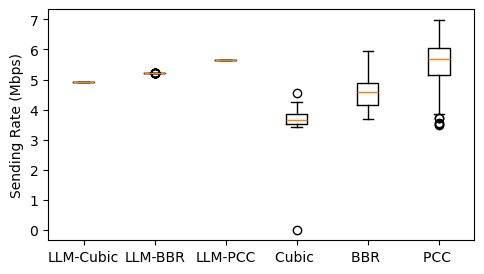

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the CSV files and their corresponding labels
csv_files = {
    "LLM-Cubic": r"C:\Users\User\Documents\ADR\Viz Testing\sending_rates0.csv",
    "LLM-BBR": r"C:\Users\User\Documents\ADR\Viz Testing\sending_rates1.csv",
    "LLM-PCC": r"C:\Users\User\Documents\ADR\Viz Testing\sending_rates2.csv",
    "Cubic ": r"C:\Users\User\Documents\ADR\encoded_CCA_0.csv",
    "BBR ": r"C:\Users\User\Documents\ADR\encoded_CCA_1.csv",
    "PCC ": r"C:\Users\User\Documents\ADR\encoded_CCA_2.csv",
}

# Initialize a dictionary to store sending rates for plotting
sending_rates_data = {}

# Process each CSV file
for label, file_path in csv_files.items():
    try:
        # Read the CSV file
        df = pd.read_csv(file_path)
        
        if "Average_Sending_Rate" in df.columns:  # Handle sending_rates*.csv
            # Convert Average_Sending_Rate to Mbps (if not already in Mbps)
            sending_rates_mbps = (df["Average_Sending_Rate"] * 8) / 1_000_000
            sending_rates_data[label] = sending_rates_mbps.tolist()
        elif "SendingRate" in df.columns:  # Handle encoded_CCA_*.csv
            # Consider only the first 100 rows
            sending_rates_mbps = (df["SendingRate"].iloc[:100] * 8) / 1_000_000
            sending_rates_data[label] = sending_rates_mbps.tolist()
        else:
            print(f"File {file_path} does not contain expected columns. Skipping.")
    except Exception as e:
        print(f"Error processing {file_path}: {e}")


# Create a combined box plot
plt.figure(figsize=(5.5, 3))

# Plot the data
plt.boxplot(sending_rates_data.values(), labels=sending_rates_data.keys(), widths=0.3 )

# Add labels, title, and grid
# plt.title('Comparison of Sending Rates (Mbps) Across TCP Variants')
plt.ylabel('Sending Rate (Mbps)')
# plt.xlabel('TCP Variants')
# plt.grid(axis='y')

# Show the plot
plt.show()


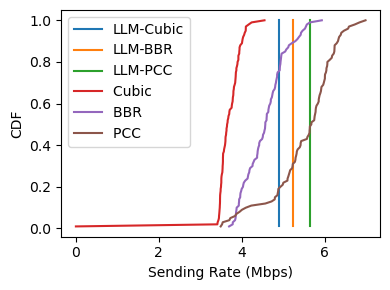

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the CSV files and their corresponding labels
csv_files = {
    "LLM-Cubic": r"C:\Users\User\Documents\ADR\Viz Testing\sending_rates0.csv",
    "LLM-BBR": r"C:\Users\User\Documents\ADR\Viz Testing\sending_rates1.csv",
    "LLM-PCC": r"C:\Users\User\Documents\ADR\Viz Testing\sending_rates2.csv",
    "Cubic ": r"C:\Users\User\Documents\ADR\encoded_CCA_0.csv",
    "BBR ": r"C:\Users\User\Documents\ADR\encoded_CCA_1.csv",
    "PCC ": r"C:\Users\User\Documents\ADR\encoded_CCA_2.csv",
}

# Initialize a dictionary to store sending rates for plotting
sending_rates_data = {}

# Process each CSV file
for label, file_path in csv_files.items():
    try:
        # Read the CSV file
        df = pd.read_csv(file_path)
        
        if "Average_Sending_Rate" in df.columns:  # Handle sending_rates*.csv
            # Convert Average_Sending_Rate to Mbps (if not already in Mbps)
            sending_rates_mbps = (df["Average_Sending_Rate"] * 8) / 1_000_000
            sending_rates_data[label] = sending_rates_mbps.tolist()
        elif "SendingRate" in df.columns:  # Handle encoded_CCA_*.csv
            # Consider only the first 100 rows
            sending_rates_mbps = (df["SendingRate"].iloc[:100] * 8) / 1_000_000
            sending_rates_data[label] = sending_rates_mbps.tolist()
        else:
            print(f"File {file_path} does not contain expected columns. Skipping.")
    except Exception as e:
        print(f"Error processing {file_path}: {e}")


# Plot CDF for each TCP variant
plt.figure(figsize=(4, 3))

# Plot the CDF for each TCP variant
for label, data in sending_rates_data.items():
    # Sort the data
    sorted_data = np.sort(data)
    
    # Calculate the cumulative distribution (CDF)
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    
    # Plot the CDF
    plt.plot(sorted_data, cdf, label=label)

# Add labels, title, and grid
# plt.title('Cumulative Distribution Function (CDF) of Sending Rates (Mbps) Across TCP Variants')
plt.xlabel('Sending Rate (Mbps)')
plt.ylabel('CDF')
plt.legend()
# plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_14816\3715478690.py:40: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  boxplot = plt.boxplot(sending_rates_data.values(), labels=sending_rates_data.keys(), patch_artist=False, widths=0.3 )


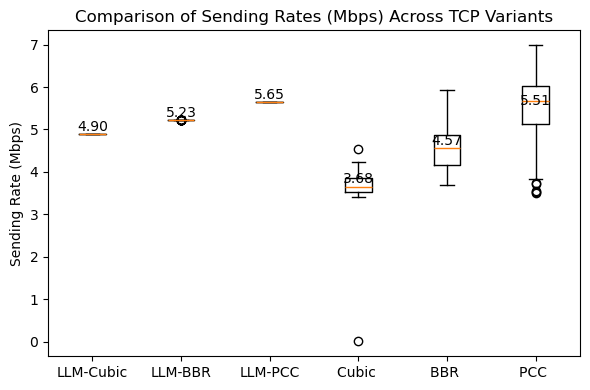

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the CSV files and their corresponding labels
csv_files = {
    "LLM-Cubic": r"C:\Users\User\Documents\ADR\Viz Testing\sending_rates0.csv",
    "LLM-BBR": r"C:\Users\User\Documents\ADR\Viz Testing\sending_rates1.csv",
    "LLM-PCC": r"C:\Users\User\Documents\ADR\Viz Testing\sending_rates2.csv",
    "Cubic ": r"C:\Users\User\Documents\ADR\encoded_CCA_0.csv",
    "BBR ": r"C:\Users\User\Documents\ADR\encoded_CCA_1.csv",
    "PCC ": r"C:\Users\User\Documents\ADR\encoded_CCA_2.csv",
}

# Initialize a dictionary to store sending rates for plotting
sending_rates_data = {}

# Process each CSV file
for label, file_path in csv_files.items():
    try:
        # Read the CSV file
        df = pd.read_csv(file_path)
        
        if "Average_Sending_Rate" in df.columns:  # Handle sending_rates*.csv
            # Convert Average_Sending_Rate to Mbps (if not already in Mbps)
            sending_rates_mbps = (df["Average_Sending_Rate"] * 8) / 1_000_000
            sending_rates_data[label] = sending_rates_mbps.tolist()
        elif "SendingRate" in df.columns:  # Handle encoded_CCA_*.csv
            # Consider only the first 100 rows
            sending_rates_mbps = (df["SendingRate"].iloc[:100] * 8) / 1_000_000
            sending_rates_data[label] = sending_rates_mbps.tolist()
        else:
            print(f"File {file_path} does not contain expected columns. Skipping.")
    except Exception as e:
        print(f"Error processing {file_path}: {e}")

# Create a combined box plot
plt.figure(figsize=(6, 4))

# Plot the data
boxplot = plt.boxplot(sending_rates_data.values(), labels=sending_rates_data.keys(), patch_artist=False, widths=0.3 )

# Calculate and plot the mean values on top of the boxes
for i, data in enumerate(sending_rates_data.values(), 1):
    mean_value = np.mean(data)  # Calculate the mean value for the group
    plt.text(i, mean_value, f'{mean_value:.2f}', horizontalalignment='center', verticalalignment='bottom', fontsize=10, color='black')

# Add labels, title, and grid
plt.ylabel('Sending Rate (Mbps)')
plt.title('Comparison of Sending Rates (Mbps) Across TCP Variants')
# plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()


This is the code to use to get the data from json logs of testing folder

Average sending rates saved to sending_rates.csv.


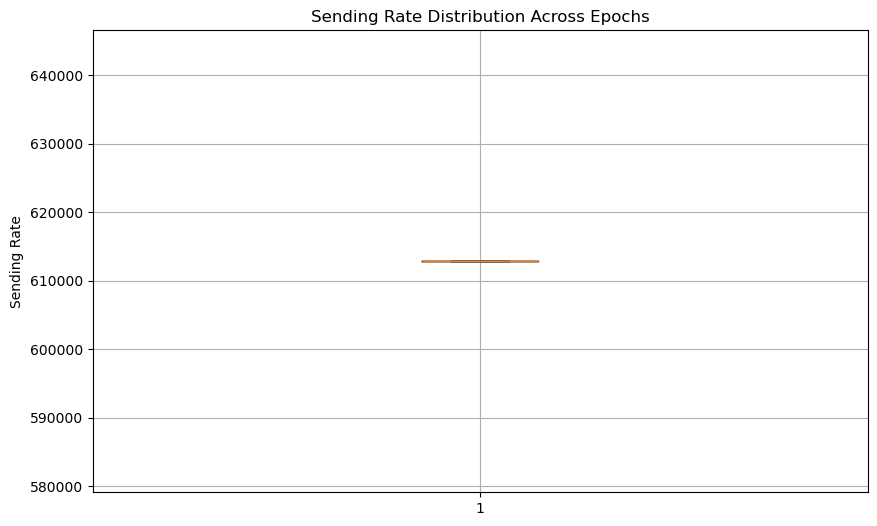

In [6]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the folder containing JSON files
folder_path = r"C:\Users\User\Documents\ADR\Viz Testing\test_llama_log0"

# Initialize a list to store the sending rates for each epoch
epoch_sending_rates = []

# Maximum actions value
max_actions = 1043241.4533971

# Loop through all JSON files with the naming pattern
for epoch in range(100):  # Assuming 100 epochs, 0 to 99
    file_name = f"custom_logs_epoch_test_{epoch}.json"  # JSON file name pattern
    file_path = os.path.join(folder_path, file_name)
    
    if os.path.exists(file_path):  # Check if the file exists
        with open(file_path, 'r') as f:
            data = json.load(f)
        
        # Extract the sending rates by multiplying actions_pred[0][0] with max_actions
        sr_list = [
            step['actions_pred'][0][0] * max_actions
            for step in data['steps'] if 'actions_pred' in step
        ]
        
        # Calculate the average sending rate for this epoch
        average_sending_rate = np.mean(sr_list) if sr_list else 0
        
        # Append the epoch and its average sending rate to the list
        epoch_sending_rates.append({'Epoch': epoch, 'Average_Sending_Rate': average_sending_rate})
    else:
        print(f"File {file_name} not found. Skipping.")

# Save the average sending rates to a CSV file
csv_file = "sending_rates.csv"
df = pd.DataFrame(epoch_sending_rates)
df.to_csv(csv_file, index=False)

print(f"Average sending rates saved to {csv_file}.")

# Plotting the box plot
plt.figure(figsize=(10, 6))
sending_rate_values = [epoch['Average_Sending_Rate'] for epoch in epoch_sending_rates]
plt.boxplot(sending_rate_values)
plt.title('Sending Rate Distribution Across Epochs')
plt.ylabel('Sending Rate')
plt.grid(True)
plt.show()
